# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [83]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [84]:
##  Importing the data set
learn = pd.read_csv('ExtraaLearn.csv') 

# copying data to another variable to avoid changes to original data
data = learn.copy()

## Data Overview

- Observations
- Sanity checks

In [85]:
## Top 5 rows of the data
data.head() 

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [86]:
##  last 5 rows of the data  
data.tail() 

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [87]:
## Shape of data
data.shape 

(4612, 15)

#### Observations: 

The dataset contains 4612 rows and 15 columns.

In [88]:
## Checking the datatypes of the colums in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

#### Observations:

* Columns (age, website_visits, time_spent_on_website and status ) are of numerical integer type.
* The page_views_per_visit column is of numerical float type.
* The other colums are of object type

In [89]:
# checking for duplicate values
data.duplicated().sum()

0

#### Observations:

There are no dulpicate values in the dataset

## Exploratory Data Analysis (EDA)



## Data Preprocessing



In [90]:
## Checking the percentage of missing values in each column
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
ID,0.00000
age,0.00000
current_occupation,0.00000
first_interaction,0.00000
profile_completed,0.00000
website_visits,0.00000
time_spent_on_website,0.00000
page_views_per_visit,0.00000
last_activity,0.00000
print_media_type1,0.00000


#### Observations: 
The dataset has no missing values in all of the columns

In [91]:
## Checking the number of unique values in each column
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

#### Observations: 
- The ID column can be dropped as it is unique for each person and will not add value to the model.
- Most of the variables are categorical except for Age, website_visits, time_spent_on_website and page_views_per_visit

In [92]:
# Dropping the ID column
data.drop(columns='ID',inplace=True)


It is a good idea to explore the data once again after manipulating it.

In [93]:
## Checking the statistical summary of the data.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


#### Observations: 
- Number of website visits AND number of page views per visit has some outliers at the right end as the respective 75th percentiles (5 & 3.756) are much lower than the respective max (30 & 18.43). This should be explored further.

- We can see that the target variable - status has more values closer to 0. ie  More leads were NOT converted to a paid customer as the mean for status was 0.29857 which is closer to 0.



In [94]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------------------------------------
No     4085
Yes     527
Name: digital_media, dtype: int64
--------------------------------------------------
No     3907
Yes     705
Name: educational_channels, dtype: int64
--------------------------

#### Observations: 
- More than half of the leads were professionals.
- Majority of the leads had LOW profile completion
- the number of profiles with MED and HIGH competions are almost equal
- The majority of the leads were NOT referred

### Univariate Analysis

In [95]:
# Defining a function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on age

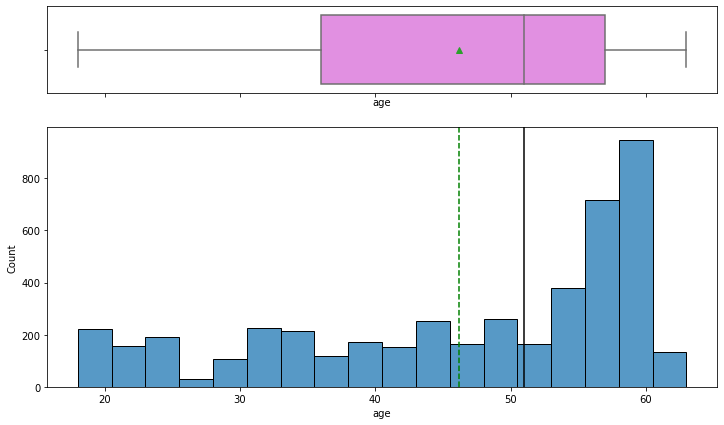

In [96]:
# Plotting a histogram_boxplot for age
histogram_boxplot(data, "age") 

 #### Observations

- Age distribution is skewed to the left.
- The boxplot for the age column confirms that there are no outliers
- Age could be an important variable deciding wheter a lead will be converted to a paid customor not or not. We will further explore this in bivariate analysis.

### Observations on website_visits

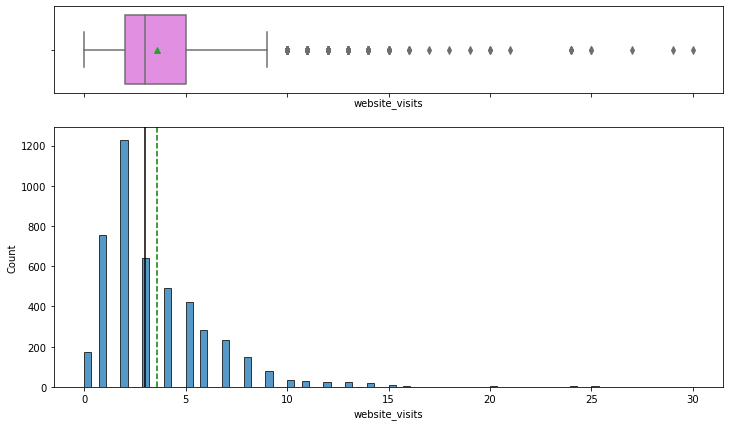

In [97]:
# Plotting a histogram_boxplot for website_visits
histogram_boxplot(data, "website_visits") 

#### Observations

- The distribution for the number of website visits is right-skewed.
- Most of the number of website visits were below 5
- There are many outliers on the right end as they are very far from the upper whisker in the boxplot.

In [98]:
# Checking how many leads have not visited web-site
data[data["website_visits"] == 0].shape

(174, 14)

* 174 leads have not visited the website

### Observations on number of time_spent_on_website

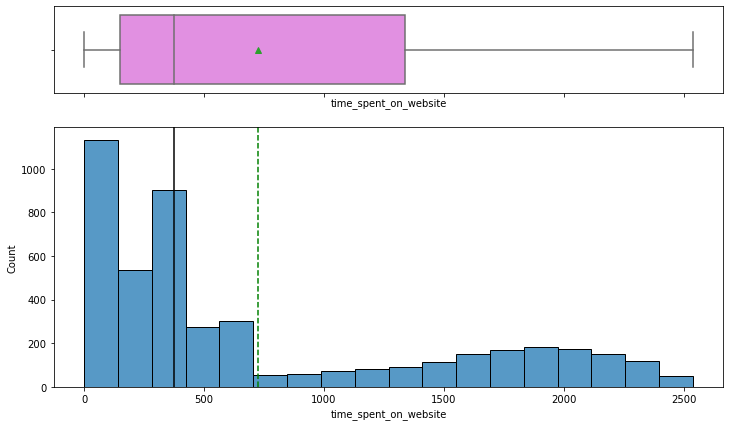

In [30]:
# Plotting a histogram_boxplot for time_spent_on_website
histogram_boxplot(data, "time_spent_on_website") 

#### Observations

- The distribution for the amount of time spent on website is right-skewed.
- Most of the leads spent at least 700 secs on the website.
- There are no outliers.
- There is wide range for the time spent on website.

### Observations on number of page_views_per_visit

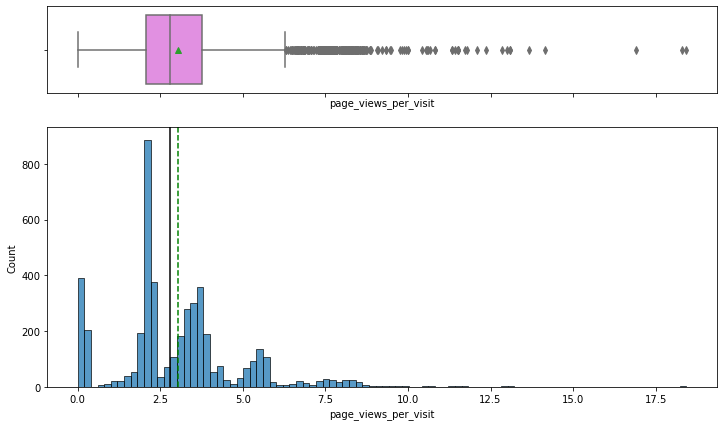

In [99]:
# Plotting a histogram_boxplot for page_views_per_visit
histogram_boxplot(data, "page_views_per_visit") 

#### Observations

- The distribution for the number of page views per visit looks normal with median and mean around 3.
- There are many outliers on the right as they are on the right side of the upper whisker in the boxplot.

In [101]:
# Defining a function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on current_occupation

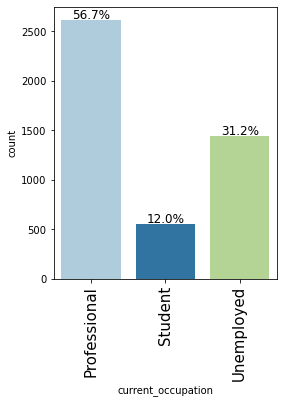

In [102]:
# Plotting a labeled_barplot for current occupation
labeled_barplot(data, "current_occupation", perc=True)

#### Observations

* About half of the leads were professionals, which means a large propertion of the customer base are professionals.
* A small proportion (12%) of the leads were students.

### Observations on number of first_interaction

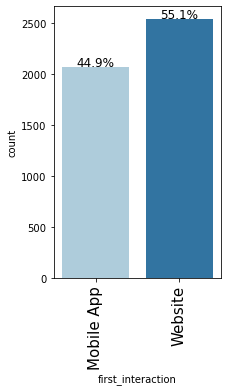

In [103]:
# Plotting a labeled_barplot for first_interaction
labeled_barplot(data, "first_interaction", perc=True) 

#### Observations

* The first intereaction through mobile app and website were almost the same


### Observations on profile_completed

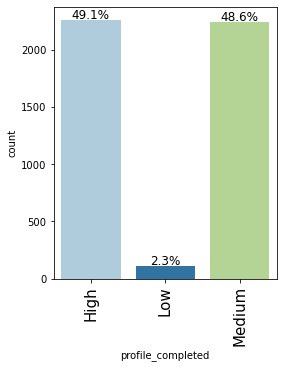

In [104]:
# Plotting a labeled_barplot for profile_completed
labeled_barplot(data, "profile_completed", perc=True) 

#### Observations

* Only a very small percentage (2.3%) of the leads had a Low profile completion
* The rest of the leads had at least a MED profile completion meaning a large proportion of the leads put in effort into commpletting their profile.


### Observations on last_activity

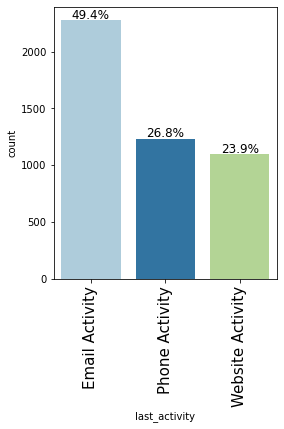

In [105]:
# Plotting a labeled_barplot for last_activity
labeled_barplot(data, "last_activity", perc=True) 

#### Observations

* Almost half of the leads' last activity was through email, which could mean most of leads's queries were cleared through emails.
* Amount of leads whosee last activity through phone or website were close. 

## Observations on print_media_type1

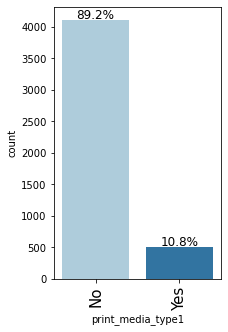

In [106]:
# Plotting labeled_barplot for print_media_type1
labeled_barplot(data, "print_media_type1", perc=True) 

#### Observations

* Most of the leads had NOT seen the ad of ExtraaLearn in the Newspaper meaning most of the leads do not read the Newspaper and publishing an ad in the newspaper doesnt help alot.



### Observations on print_media_type2

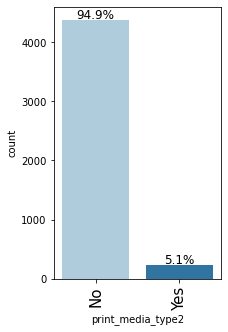

In [107]:
# Plotting a labeled_barplot for print_media_type2
labeled_barplot(data, "print_media_type2", perc=True) 

#### Observations

* Most of the leads had NOT seen the ad of ExtraaLearn in the magazine meaning most of the leads do not read the magazine and publishing an ad in the magazine doesnt help alot.

### Observations on digital_media

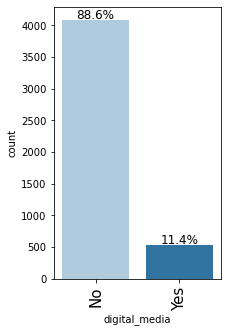

In [108]:
# Plottin a labeled_barplot for digital_media
labeled_barplot(data, "digital_media", perc=True) 

#### Observations

* Most of the leads had NOT seen the ad of ExtraaLearn on the digital platforms


### Observations on educational_channels

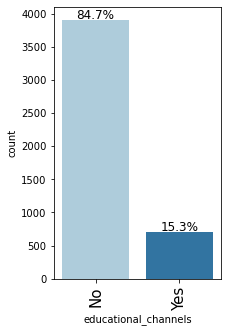

In [109]:
# Plotting labeled_barplot for educational_channels
labeled_barplot(data, "educational_channels", perc=True) 


#### Observations

* Most of the leads had NOT  heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.




### Observations about advertisements

* Out of all the adviertising methods, the education channels like online forums, discussion threads, educational websites were the most useful.


### Observations on referral

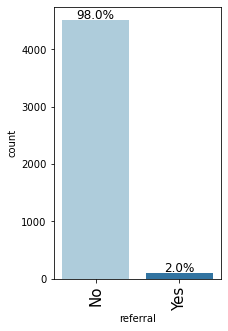

In [110]:
# Plotting a labeled_barplot for referral
labeled_barplot(data, "referral", perc=True) 

#### Observations

* Almost of the leads were not referred.
* This means the company doesnt put empahsis on referrering. 

### Observations on status

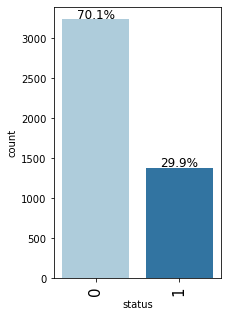

In [111]:
# Plotting a labeled_barplot for status
labeled_barplot(data, "status", perc=True) 


#### Observations

- The distribution of both classes in the target variable is imbalanced.
* Only about 30 % of the leads were converted to a paid customer. 
* Improvement is definietly needed to increase percentage of leads converted.


### Bivariate Analysis

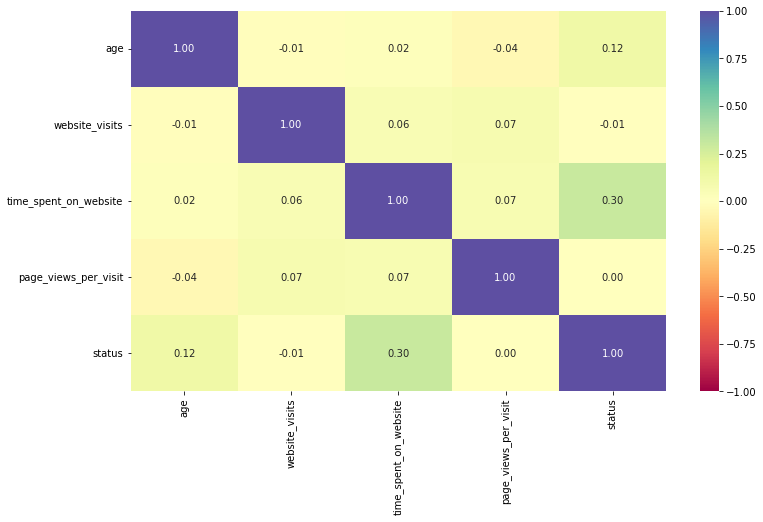

In [112]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations

- There seems to be a slight positive corelation between time spent on website and status which could mean the amount of time spent on the website may lead to whether the lead was converted or not.
- Age and status have a  very weak positive correlation, which could mean age is a small decidiging factor whether a lead gets converted or not. 
- No other variables have a high correlation among them.

In [113]:
### Defining a function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [116]:
### Defining a function to plot stacked barplots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Leads will have different expectations from the outcome of the course and the current occupation may play a key role for them to take the program. Analysing how current occupation affects lead status.**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


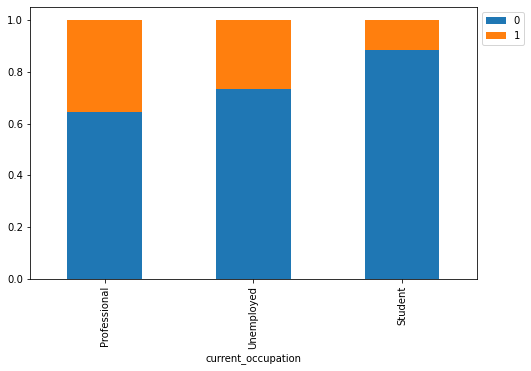

In [117]:
# Plotting a stacked_barplot for current occupation and status
stacked_barplot(data, "current_occupation", "status")

#### Observations
The lead converstion rate (35%) was highest for professsionals.
Since a large proportion of the leads were professionals and about 35 percent of them converted, the company should try to target more professionals.


**Age can be a good factor to differentiate between such leads**

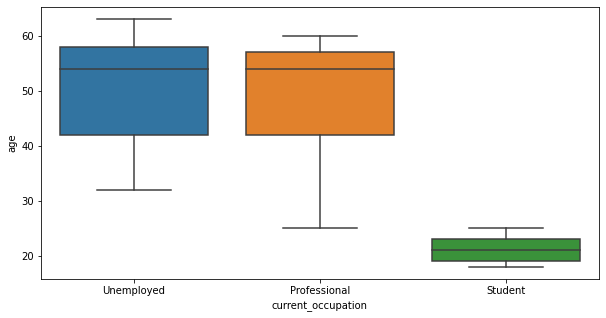

In [118]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = data["current_occupation"], y = data["age"])
plt.show()

In [119]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


#### Observations
Most of the professionals were aged between 42 to 57. 
This age group is similar for most unemployed people. 
This means that the company could try to target people aged between 42 to 57 to increase the chances they attract a proffesional, therby increaseing the chance of lead conversion rate.
 

**The company's first interaction with leads should be compelling and persuasive. Checking if the channels of the first interaction have an impact on the conversion of leads**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


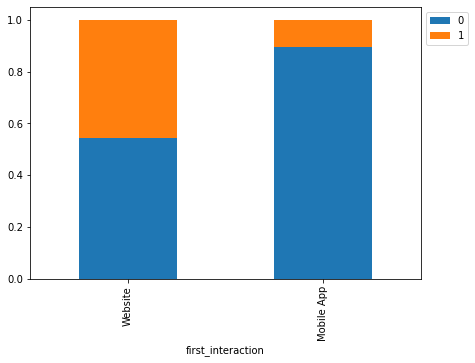

In [120]:
# Plotting a stacked_barplot for first_interaction and status
stacked_barplot(data, "first_interaction", "status") 

#### Observations
The lead converstion rate (45%) was higher for leads who first intereacted through websites.
This could mean that the first interaction through website could be more compelling and persuasive to cause leads to convert.

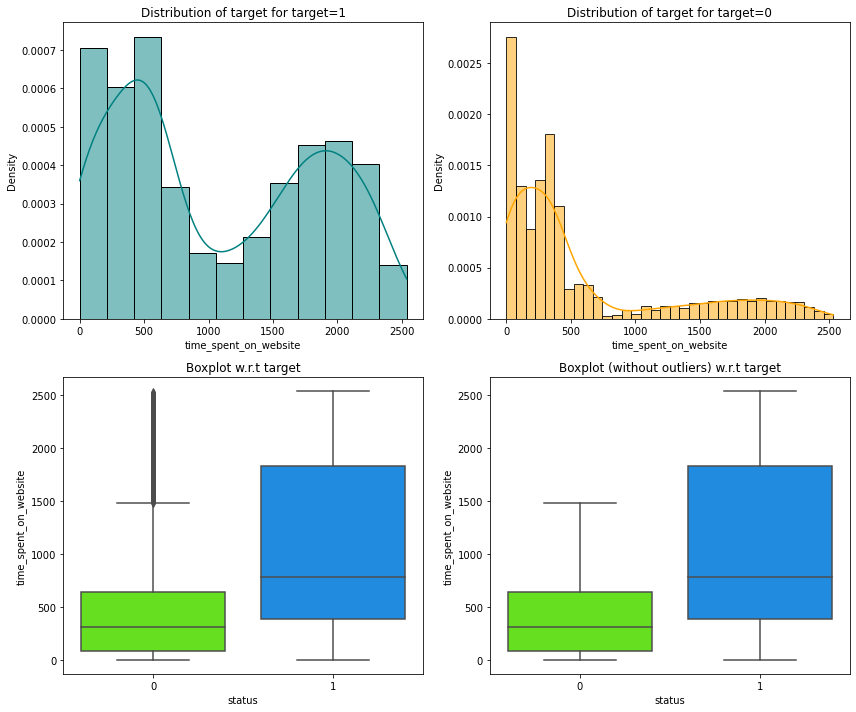

In [121]:
# Plotting a distribution for time_spent_on_website and status
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

In [122]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

#### Observations
* When the outliers for those who were not converted are removed from the box plot, it could be seen that those leads who spend more than about 700 sec on the website tend to convert to a paid customer. 
* Those leads who spend less than around 350 sec, did not convert. 
* A higher time spent on website leads to a higher chance the lead gets converted. Howerver, too much time (~1700s) spent on the website could lead to the lead not converting. This is evidenced by the outliers in the status = 0   box plot.

**A similar analysis for number of website visits and page views per visit will be done.**

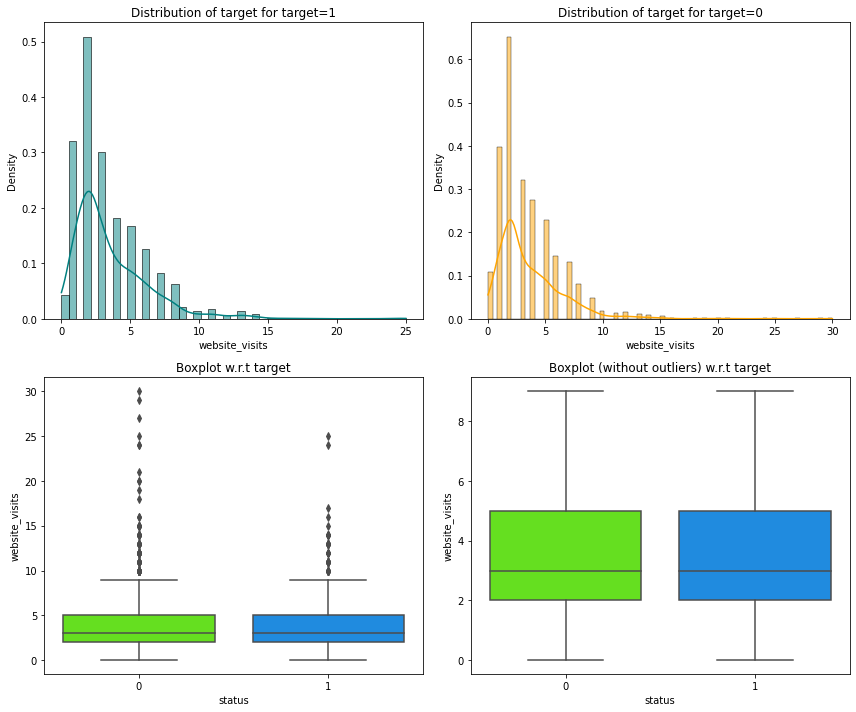

In [123]:
# Plotting a distribution for website_visits and status
distribution_plot_wrt_target(data, "website_visits", "status") 

In [124]:
# checking the median value
data.groupby(["status"])["website_visits"].median()

status
0   3.00000
1   3.00000
Name: website_visits, dtype: float64

#### Observations
* The same median for the status is observed
* The box plots are simlilar for leads who gets converted or not, based on number of website visits.
* Hence, it is unlikely that the number of website visits affects the conversion rate.  

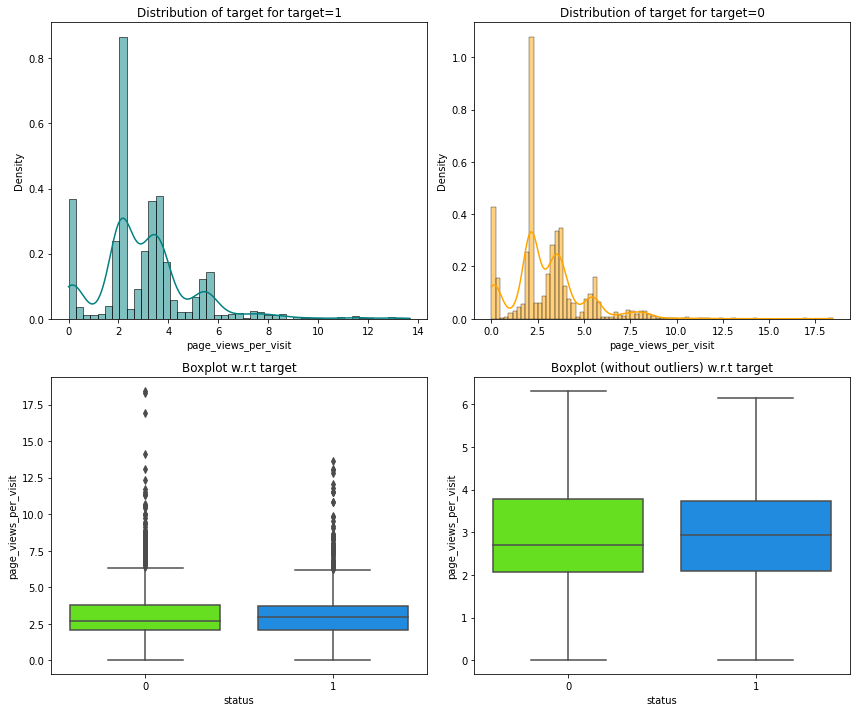

In [125]:
# Plotting a distribution for page_views_per_visit and status
distribution_plot_wrt_target(data, "page_views_per_visit", "status") 

In [126]:
# checking the median value
data.groupby(["status"])["page_views_per_visit"].median()

status
0   2.70600
1   2.93500
Name: page_views_per_visit, dtype: float64

#### Observations
* A similar median for the status is observed
* The box plots are simlilar for leads who gets converted or not, based on number of page views per visit.
* Hence, it is unlikely that the number of page views per visit affects the conversion rate. 

**People browsing the website or the mobile app are generally required to create a profile by sharing their personal details before they can access more information. Checking if the profile completion level has an impact on lead status**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


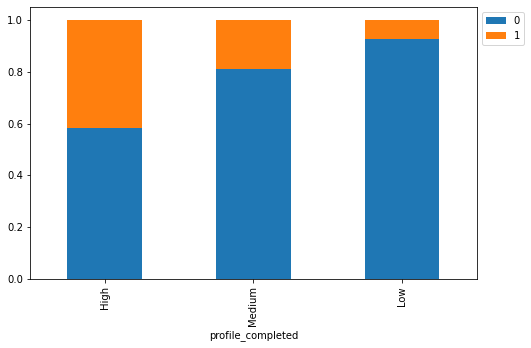

In [127]:
# Plotting a stacked_barplot for profile_completed and status
stacked_barplot(data, "profile_completed", "status")  

#### Observations
The lead converstion rate (~40%) was highest for leads who had high competion of profile
This could mean that the leads who put in more time to fully complete the profile and who were willing to share their personal details, had a hhigher chance of getting converted as they had access to additional information.
The company should ensure more leads achieve a high profile completion, so that the additional information is provided to them which can increase the chances of the leads being converted.

**After a lead shares their information by creating a profile, there may be interactions between the lead and the company to proceed with the process of enrollment. Checking if the last activity impacts lead conversion status**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


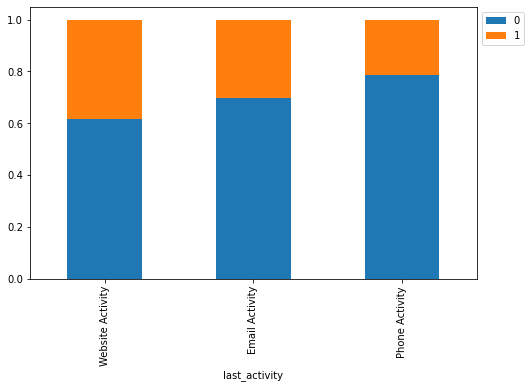

In [128]:
# Plotting a stacked_barplot for last_activity and status
stacked_barplot(data, "last_activity", "status") 

#### Observations
The lead converstion rate (~40%) was highest when last activity was thorugh website and lowest when throught phone.
This could mean when a lead last interacted through website or email, there is a high chance for them to enrol, compared to when they last intereacted through phone.

**Let's see how advertisement and referrals impact the lead status**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


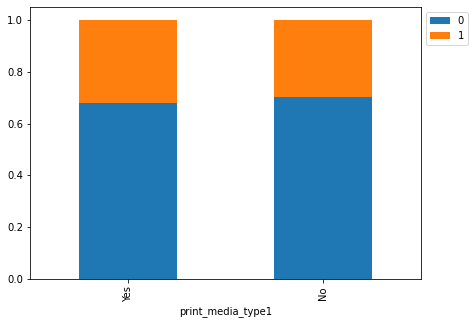

In [129]:
# Plotting a stacked_barplot for print_media_type1 and status
stacked_barplot(data, "print_media_type1", "status") 

#### Observations
The lead converstion rate was similar when compariing leads who had seen the ad on newspaper and those who had not seen the ad on newspaper. This means that seeing the ad on newspaper is unlikely to have an impact of increasing conversion rate.

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


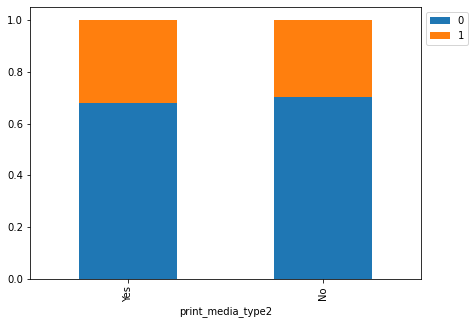

In [130]:
# Plotting a stacked_barplot for print_media_type2 and status
stacked_barplot(data, "print_media_type2", "status") 

#### Observations
The lead converstion rate was similar when compariing leads who had seen the ad on magazine and those who had not seen the ad on magazine. This means that seeing the ad on magazine is unlikely to have an impact of increasing conversion rate.

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


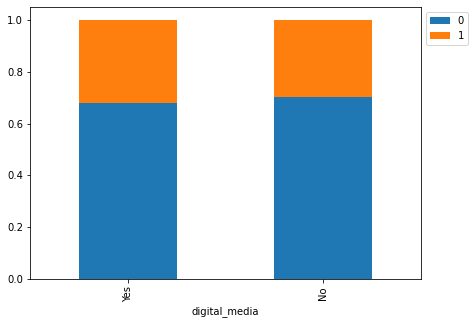

In [131]:
# Plotting a stacked_barplot for digital_media and status
stacked_barplot(data, "digital_media", "status") 

#### Observations
The lead converstion rate was similar when compariing leads who had seen the ad on ditital media and those who had not seen the ad on digital media. This means that seeing the ad on digital media is unlikely to have an impact of increasing conversion rate.

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


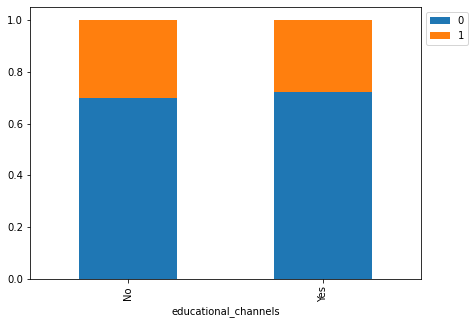

In [132]:
# Plotting a stacked_barplot for educational_channels and status
stacked_barplot(data, "educational_channels", "status") 

#### Observations
The lead converstion rate was similar when compariing leads who had seen the ad on educational channels and those who had not seen the ad on educational channels. This means that seeing the ad on educational channels is unlikely to have an impact of increasing conversion rate.

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


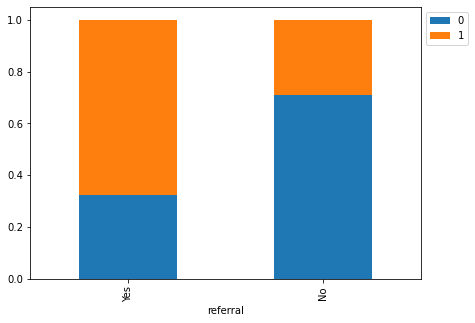

In [133]:
# Plotting a stacked_barplot for referral and status
stacked_barplot(data, "referral", "status") 

#### Observations
The lead converstion rate was much higher (around 65%) for those that had referrals compared to those who did not have referrals (~30%). This means those leads that were referred were highly likely to convert to paid customers. The company should promote more refereees, which could increase conversion rate.

The company gets leads from various channels and **referrals** have the highest lead conversion rate 

### Outlier Check

- Let's check for outliers in the data.

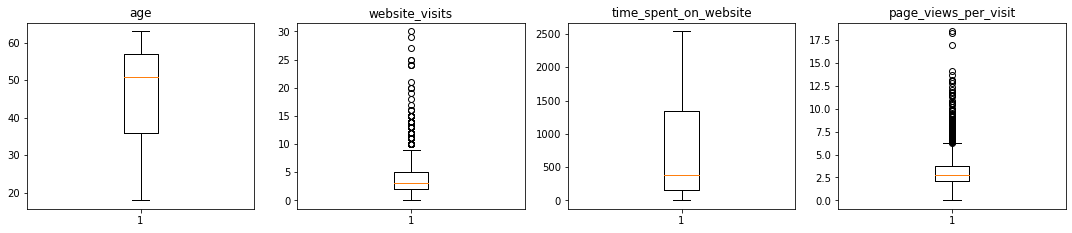

In [136]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations

* The boxplots for website visits and page views per visit has outliers

### Data Preparation for modeling



In [137]:
# Separating target variable and other variables

X = data.drop(["status"], axis=1)
Y = data['status'] 


# Creating list of dummy columns
to_get_dummies_for = ['current_occupation', 'first_interaction','profile_completed', 'last_activity','print_media_type1', 'print_media_type2',  'digital_media','educational_channels', 'referral' ]

# Getting dummies for X
X = pd.get_dummies(X, columns = to_get_dummies_for, drop_first=True) 

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [138]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
0   0.70415
1   0.29585
Name: status, dtype: float64
Percentage of classes in test set:
0   0.69509
1   0.30491
Name: status, dtype: float64


## **Building Classification Models**

#### Creating functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [139]:
# Defining a function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

## Building a Decision Tree model

In [140]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state=1)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



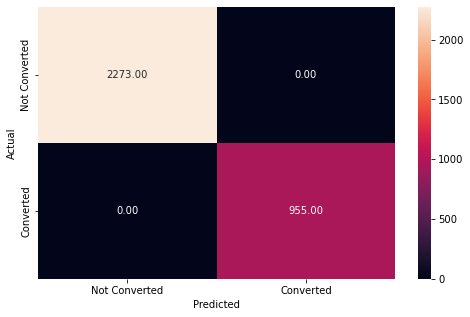

In [141]:
 # Checking performance on the training dataset
pred_train_d_tree = d_tree.predict(X_train)
metrics_score(y_train, pred_train_d_tree)

#### Observations

* The Decision tree gave a 100% score for all metrics on the training dataset
* There are no errors on the training set 
* Each sample has been classified correctly.
* Model has performed very well on the training set.


**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



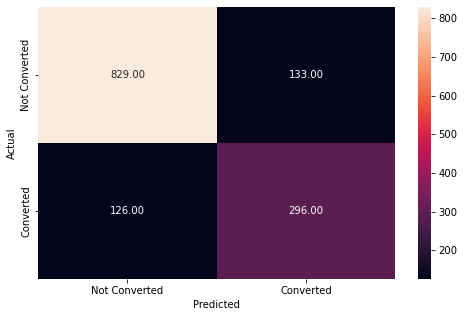

In [142]:
pred_test_d_tree = d_tree.predict(X_test)
metrics_score(y_test, pred_test_d_tree)

#### Observations

* The recall is 0.7 which means the decision tree did not do  well on the test data.
* The recall is 1 on the training data which means the decision tree is overfitting on the training data
* There is a 30 % chance that the model will predict that a person is not going to get converted even though the person would have converted.
* There is a 30% chance the company will lose potential customers due to the false-negative cases.


* The precision (0.69) on the test data suggests that there's a 31% chance that the model will predict that a person is going to get converted even though the person would not. 
* There is a 31 % chance the company might lose resources by nurturing these false-positive cases.





- **Losing a potential customer is a greater loss.**
- Company would want **Recall to be maximized ---> greater the Recall score, higher are the chances of minimizing False Negatives.**

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data. 

**This would tell the model that 1 is the important class here.**

In [144]:
# Using the Decision tree classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Running the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Setting the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

#### Checking model performance on train and test set

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



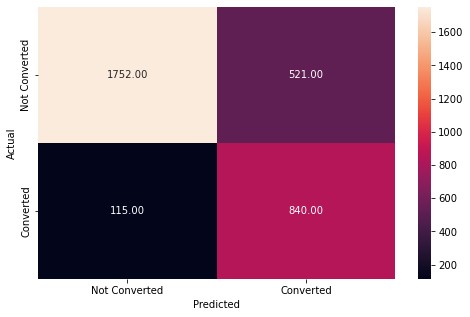

In [145]:
# Checking performance on the training dataset
dt_tuned = d_tree_tuned.predict(X_train)
metrics_score(y_train,dt_tuned)

#### Observations

* The recall is 0.88 which has reduced from 1
* The precision (0.62) on the training data has reduced from 1.
* This mean overfitting on the training data has reduced after tuning.



              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



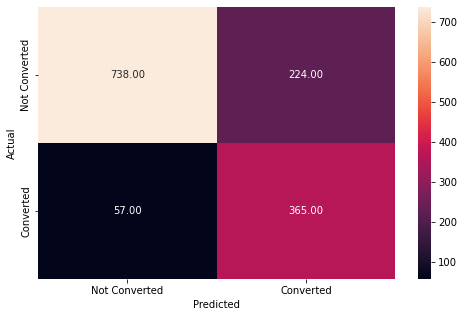

In [146]:
# Checking performance on the testing dataset
y_pred_tuned = d_tree_tuned.predict(X_test)
metrics_score(y_test,y_pred_tuned)

#### Observations

* The recall is 0.86 (which is higher now) which means the decision tree did better on the test data, after tuning.
* There is a 14 % chance that the model will predict that a person is not going to get converted even though the person would have converted.
* The company will lose LESSER potential customers due to the false-negative cases, after tuning.


* The precision (0.62) (which is lower now) on the test data suggests that there's a 38% chance that the model will predict that a person is going to get converted even though the person would not. 
* The company might lose MORE resources by nurturing these false-positive cases.





#### SUMMARY

After tuning the model, recall has increased but precision has decreased. Since losing a potential customer is a greater loss **ie a greater recall is better**, the tuned model has performed better at the expense of more resources being used

### Visualizing the Decision Tree

**Let's visualize the tuned decision tree** and observe the decision rules:

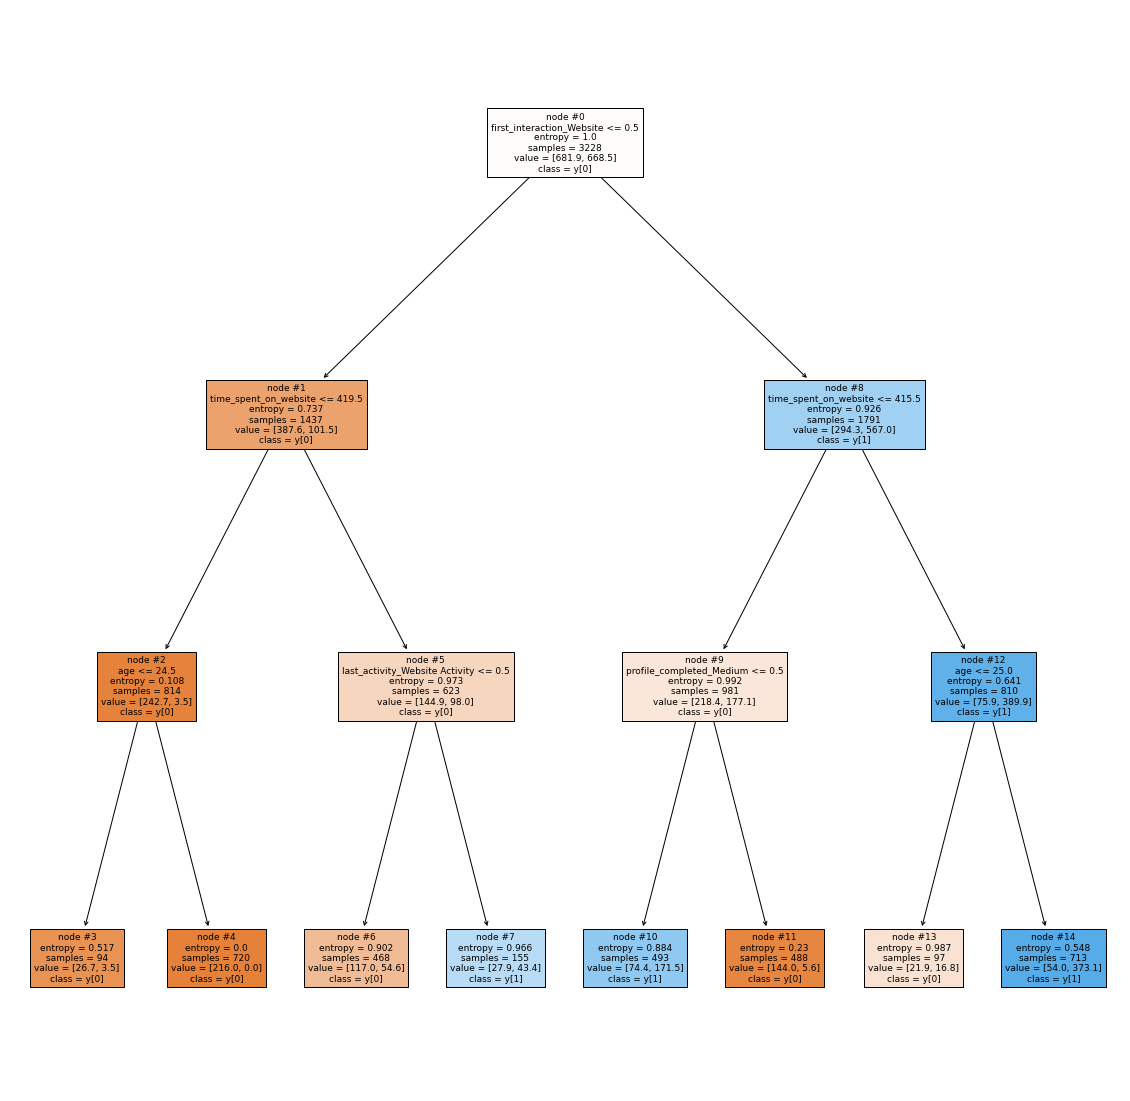

In [147]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Note:** Blue leaves represent the converted leads while the orange leaves represent the not converted leads. Also, the more the number of observations in a leaf, the darker its color gets.

**Looking at the feature importance** of the tuned decision tree model

In [148]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


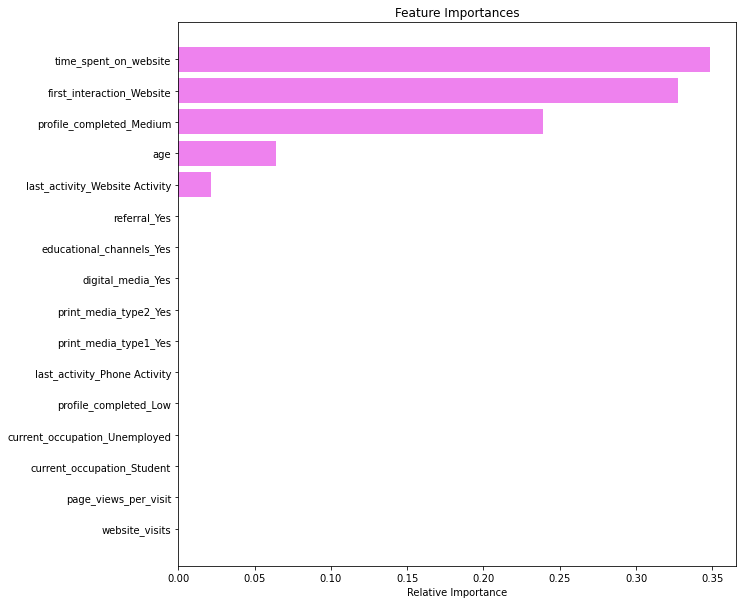

In [149]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

#### Observations

- Time spent on the website and first_interaction_website are the most important features.
- Medium profile_completed, age, and last_activity through website are somewhat important features.
- The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not.

## Building a Random Forest model

In [150]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



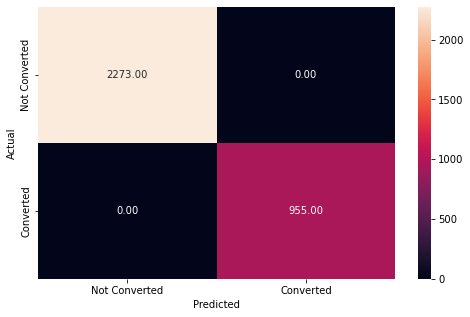

In [151]:
# Checking performance on the training data

y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

#### Observations

* The Random Forest gave a 100% score for all metrics on the training dataset
* There are no errors on the training set 
* Each sample has been classified correctly.
* Model has performed very well on the training set.


**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       962
           1       0.78      0.68      0.73       422

    accuracy                           0.84      1384
   macro avg       0.82      0.80      0.81      1384
weighted avg       0.84      0.84      0.84      1384



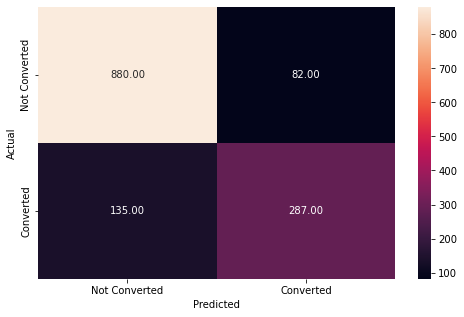

In [152]:
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

#### Observations

* The recall is 0.68 which means the random forest did not do  well on the test data.
* The recall is 1 on the training data which means the random forest is overfitting on the training data
* There is a 32 % chance that the model will predict that a person is not going to get converted even though the person would have converted.
* There is a 32% chance the company will lose potential customers due to the false-negative cases.


* The precision (0.78) on the test data suggests that there's a 22% chance that the model will predict that a person is going to get converted even though the person would not. 
* There is a 22 % chance the company might lose resources by nurturing these false-positive cases.



- **Losing a potential customer is a greater loss.**
- Company would want **Recall to be maximized ---> greater the Recall score, higher are the chances of minimizing False Negatives.**

**Let's see if we can get a better model by tuning the random forest classifier**

### **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**. 

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [156]:
# Choosing the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Running the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Saving the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_
 



In [157]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



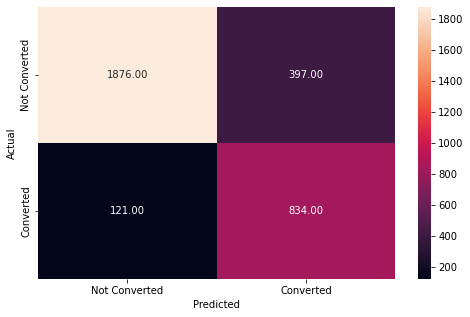

In [158]:
# Checking performance on the training data
rf_tuned = rf_estimator_tuned.predict(X_train)
metrics_score(y_train,rf_tuned)



#### Observations

* The recall is 0.87 which has reduced from 1
* The precision (0.68) on the training data has reduced from 1.
* This mean overfitting on the training data has reduced after tuning.



**Let's check the model performance on the test data**

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



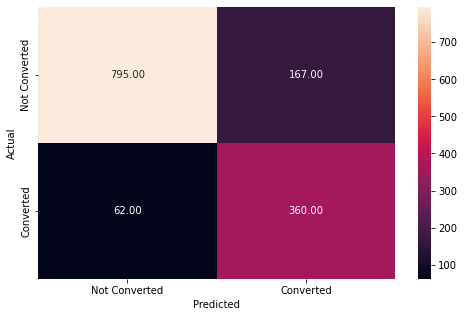

In [161]:
# Checking performance on the test data
y_pred_tuned = rf_estimator_tuned.predict(X_test)
metrics_score(y_test,y_pred_tuned)


#### Observations

* The recall is 0.85 (which is higher now) which means the random forest did better on the test data, after tuning.
* There is a 15 % chance that the model will predict that a person is not going to get converted even though the person would have converted.
* The company will lose LESSER potential customers due to the false-negative cases, after tuning.


* The precision (0.68) (which is lower now) on the test data suggests that there's a 32% chance that the model will predict that a person is going to get converted even though the person would not. 
* The company might lose MORE resources by nurturing these false-positive cases.




#### SUMMARY

After tuning the model, recall has increased but precision has decreased. Since losing a potential customer is a greater loss **ie a greater recall is better**, the tuned model has performed better at the expense of more resources being used

One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.

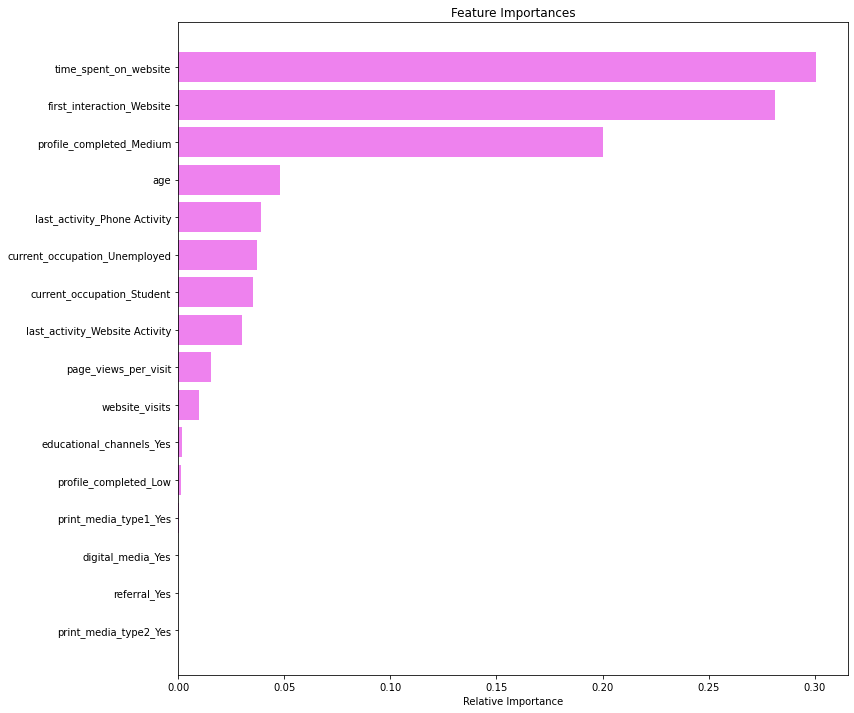

In [163]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

#### Observations

- Just like the Decision tree model, time spent on the website and first_interaction_website are the most important features.
- Medium profile_completed is somewhat an important feature
- The other variables have little to no impact in this model, while deciding whether a lead will be converted or not. 

## **Conclusion and Recommendations**

- A high percentage (70%) of leads were NOT converted to paid customers thereby raising the need for improvement in conversion rates. 
- Most of the leads who were converted were professionals. The company should try to target more professionals, instead of unemployed people and students. 
- The lead conversion rate  was highest for leads who first interacted through websites and also highest when they last interacted through website, making websites a major platform for leads, by which they are persuaded to convert to a paid customer. The company should invest more into developing a more user-friendly and more accessible website for future leads to gain easy access to.
- All the means of advertising didn’t have much impact on the conversion rate as a similar conversion rate was observed whether a lead has seen the advertisement or not. The company could invest less in these advertisements to save money. 
- However, a major difference in conversion rate was seen in whether a lead was being referred or not. A much higher percentage of the leads who were referred, converted to paid customers. Hence, sending out referrals is more important then advertising methods. More referrals should be encouraged by the company.
---------
- 2 models (decision tree and random forest) were built to try and predict the status of a lead based on the factors. Both models performed better after they were tuned, compared to before they were tuned. This is because tuning the models, reduced overfitting of the data on the training sets, which allowed the model to perform better for the test sets. 
- A key measurement was the RECALL, which is what is to be MAXIMISED. Recall increased after tuning, for both models. This thereby lowered the chance that the company will lose potential customers  due to false-negative cases. 
- However, the downside was the PRECISION reduced, causing a higher chance for the model to produce false-positive cases, causing more resources to be wasted.
- When comparing the Decision tree and Random forest models AFTER TUNING, both models gave a similar Recall (0.86 & 0.85 ) but a slightly different Precision (0.62 & 0.68). Overall, since Random forest (after tuning) had a higher precision, it would be the better model.

- From the 2 models, it was also observed that the most important features that help distinguish between not converted and converted leads were: 
    * time spent on website 
    * first interaction through website 
    * medium  profile completions
- This again shows the importance of websites as a medium